<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/GameStatsGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Install the library for NFL Data
!pip install nfl_data_py
import nfl_data_py as nfl

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import nfl_data_py as nfl

In [88]:
#Data import and cleaning
years = [2022]

df2022 = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df2022.reset_index(drop=True, inplace=True)
df2022 = df2022.loc[df2022.season_type=='REG']
#df2022 = df2022.loc[((df2022['play_type'].isin(['no_play', 'pass', 'run'])) | (df2022['play_type'] == '')) & (df2022['epa'].notna())]
df2022.loc[df2022['pass']==1, 'play_type'] = 'pass'
df2022.loc[df2022["rush"]==1, 'play_type'] = 'run'

df2022.reset_index(drop=True, inplace=True)
df2022.head()

2022 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [89]:
#Data import and cleaning
years = [2023]

df = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df.reset_index(drop=True, inplace=True)
df = df.loc[df.season_type=='REG']
#df = df.loc[(df.play_type.isin(['no_play','pass','run', '']))]
df.loc[df['pass']==1, 'play_type'] = 'pass'
df.loc[df["rush"]==1, 'play_type'] = 'run'

df.reset_index(drop=True, inplace=True)

2023 done.
Downcasting floats.


In [90]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

In [91]:
df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [92]:
pen_team = df["penalty_team"]
df1 = pd.DataFrame(pen_team)

In [93]:
df1 = df1.dropna()

In [94]:
df1.head()

,penalty_team
10,WAS
17,WAS
18,ARI
21,ARI
23,ARI


In [95]:
team = pen_team.value_counts()

In [96]:
pen = team.values
tm = team.index

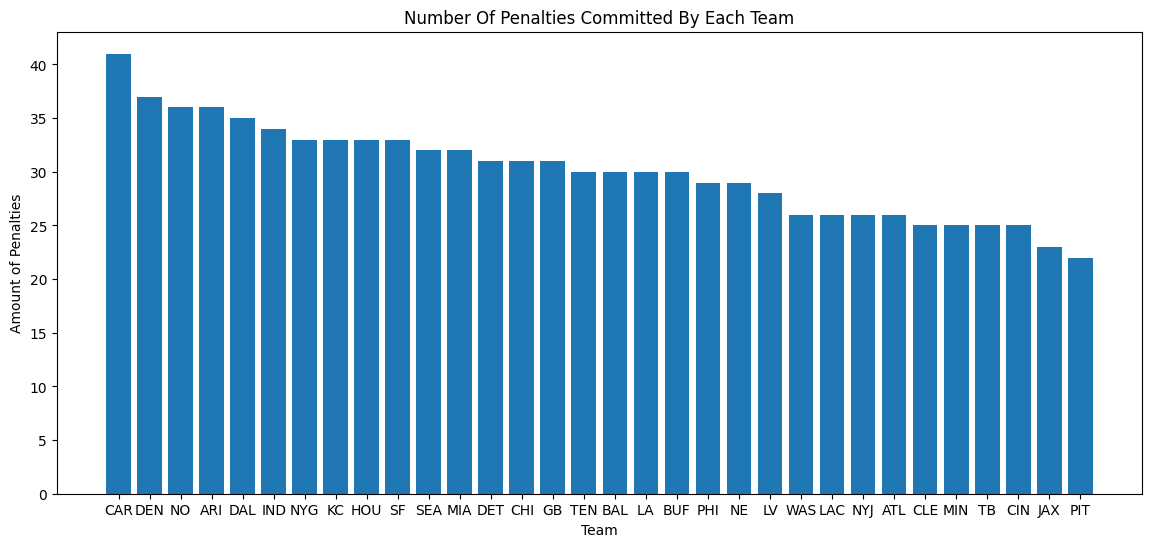

In [97]:
plt.figure(figsize=(14, 6))
plt.bar(tm, pen, width = .8)

plt.xlabel('Team')
plt.ylabel('Amount of Penalties')
plt.title('Number Of Penalties Committed By Each Team')

plt.show()

In [98]:
df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

In [99]:
stacked_df = df3.pivot(index='penalty_team', columns='down', values='count').fillna(0)

In [100]:
# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]

In [101]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [102]:
team_base_color = [
    (151, 35, 63), (167, 25, 48), (36, 23, 115), (0, 51, 141), (0, 133, 202), (0, 20, 63), (251, 79, 20), (251, 79, 20),
    (176, 183, 188), (255, 128, 0), (4, 110, 180), (36, 66, 60), (201, 36, 63), (0, 61, 121), (19, 102, 119), (202, 36, 48),
    (0, 33, 71), (32, 114, 186), (196, 201, 204), (0, 145, 160), (79, 46, 132), (10, 35, 66), (160, 138, 88), (25, 46, 108),
    (32, 55, 49), (1, 74, 83), (255, 194, 14), (122, 193, 66), (201, 36, 63), (212, 9, 9), (64, 149, 209), (255, 194, 15)
]

lighter_colors = []
darker_colors = []
normal_colors = []
for color in team_base_color:

    r, g, b = color
    # Lighten the color by adding to each component
    r_lighter = min(255, r + 70)  # Increase the R component
    g_lighter = min(255, g + 70)  # Increase the G component
    b_lighter = min(255, b + 70)  # Increase the B component

    # Darken the color by subtracting from each component
    r_darker = max(0, r - 70)  # Decrease the R component
    g_darker = max(0, g - 70)  # Decrease the G component
    b_darker = max(0, b - 70)  # Decrease the B component

    # Append lighter and darker colors in RGB form to lists
    lighter_colors.append((r_lighter/255.0, g_lighter/255.00, b_lighter/255.0, 1.0))
    normal_colors.append((r/255.0, g/255.0, b/255.0, 1.0))
    darker_colors.append((r_darker/255.0, g_darker/255.0, b_darker/255.0, 1.0))

RGBA_colors = [lighter_colors, normal_colors, darker_colors]
print(RGBA_colors)

[[(0.8666666666666667, 0.4117647058823529, 0.5215686274509804, 1.0), (0.9294117647058824, 0.37254901960784315, 0.4627450980392157, 1.0), (0.41568627450980394, 0.36470588235294116, 0.7254901960784313, 1.0), (0.27450980392156865, 0.4745098039215686, 0.8274509803921568, 1.0), (0.27450980392156865, 0.796078431372549, 1.0, 1.0), (0.27450980392156865, 0.35294117647058826, 0.5215686274509804, 1.0), (1.0, 0.5843137254901961, 0.35294117647058826, 1.0), (1.0, 0.5843137254901961, 0.35294117647058826, 1.0), (0.9647058823529412, 0.9921568627450981, 1.0, 1.0), (1.0, 0.7764705882352941, 0.27450980392156865, 1.0), (0.2901960784313726, 0.7058823529411765, 0.9803921568627451, 1.0), (0.41568627450980394, 0.5333333333333333, 0.5098039215686274, 1.0), (1.0, 0.41568627450980394, 0.5215686274509804, 1.0), (0.27450980392156865, 0.5137254901960784, 0.7490196078431373, 1.0), (0.34901960784313724, 0.6745098039215687, 0.7411764705882353, 1.0), (1.0, 0.41568627450980394, 0.4627450980392157, 1.0), (0.27450980392156

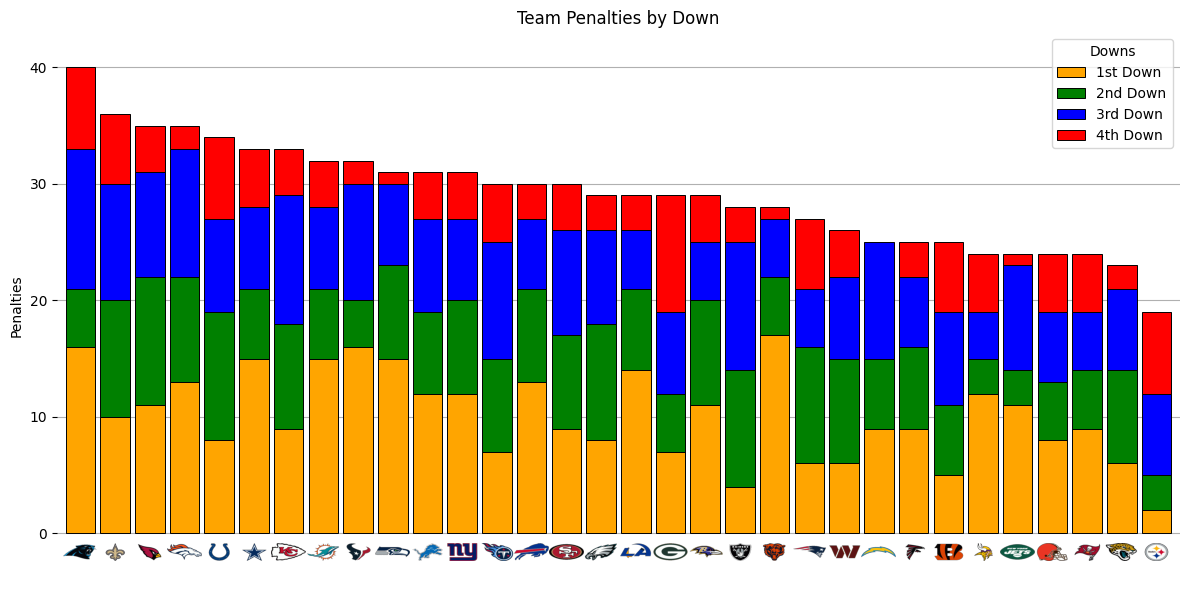

In [103]:
colors = ['orange', 'green', 'blue', 'red']

ax = sorted_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.85, color=colors, edgecolor='black', linewidth=0.7, zorder=3)

# Add labels
plt.xlabel('Teams')
plt.ylabel('Penalties')
plt.title('Team Penalties by Down')

# Add images
for i, team_name in enumerate(sorted_df.index):
  img_path = image_paths.get(team_name)
  img = mpimg.imread(img_path)
  ax.imshow(img, extent=[i - 0.5, i + 0.5, -2.4, -0.9], aspect='auto', alpha=1, zorder=5)

# Add legend
legend_labels = ['1st Down', '2nd Down', '3rd Down', '4th Down ']
plt.legend(legend_labels, title = "Downs")

ax.set_ylim([-4, (team_totals).values.max() + 3])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(zorder=0)

# Show the graph
plt.tight_layout()
plt.show()

In [104]:
down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

print(sorted_df.index)


Index(['CAR', 'NO', 'ARI', 'DEN', 'IND', 'DAL', 'KC', 'MIA', 'HOU', 'SEA',
       'DET', 'NYG', 'TEN', 'BUF', 'SF', 'PHI', 'LA', 'GB', 'BAL', 'LV', 'CHI',
       'NE', 'WAS', 'LAC', 'ATL', 'CIN', 'MIN', 'NYJ', 'CLE', 'TB', 'JAX',
       'PIT'],
      dtype='object', name='penalty_team')


In [105]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]
sorted_df.head()

down,1.0,2.0,3.0,4.0
penalty_team,,,,
CAR,16.0,5.0,12.0,7.0
NO,10.0,10.0,10.0,6.0
ARI,11.0,11.0,9.0,4.0
DEN,13.0,9.0,11.0,2.0
IND,8.0,11.0,8.0,7.0


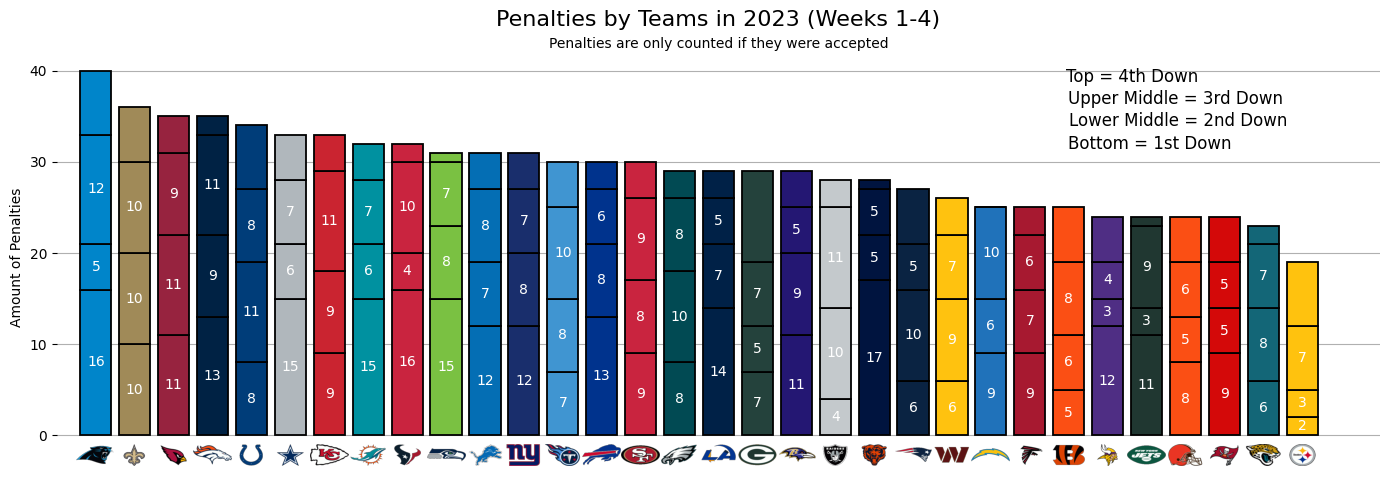

In [106]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

# Color
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

team_colors = [teamcolor.get(team) for team in sorted_df.index]

fig, ax = plt.subplots(figsize = (14,5))

index = np.arange(len(sorted_df.index))

lwidth = 1.3

ax.bar(index, down1, color=team_colors, edgecolor='k', linewidth=lwidth, zorder = 4)
ax.bar(index, down2, bottom=down1, color=team_colors,edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down3, bottom=[d1 + d2 for d1, d2 in zip(down1, down2)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down4, bottom=[d1 + d2 + d3 for d1, d2, d3 in zip(down1, down2, down3)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)

for i in range(len(sorted_df.index)):
    # Calculate the total height of the bar for this team
    total_height = down1[i] + down2[i] + down3[i] + down4[i]

    # Add labels for each segment (1st, 2nd, 3rd, 4th down)
    ax.text(i, down1[i] / 2, str(int(down1[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] / 2), str(int(down2[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] + down3[i] / 2), str(int(down3[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)

for i in range(len(sorted_df.index)):
    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.50, -3.4 ,-1], aspect='auto', zorder=3)


# Add labels
ax.set_ylabel('Amount of Penalties')
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)')

# Add a main title
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)', fontsize=16)

# Add a subtitle
subtitle = 'Penalties are only counted if they were accepted'
plt.text(0.5, 0.97, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.text(0.863, 0.925, "Top = 4th Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.927, 0.875, "Upper Middle = 3rd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.93, 0.825, "Lower Middle = 2nd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.888, 0.775, "Bottom = 1st Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, (team_totals).values.max() + 4])
plt.xlim([-1, 33])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(0, 32, 1))

ax.grid(zorder=0)
ax.xaxis.set_visible(False)


# Show the graph
plt.tight_layout()
plt.show()

In [107]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [108]:
pass_df = df[df['play_type'] == "pass"]
pass_df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [109]:
filt = pass_df.groupby('posteam')['qb_epa'].sum()
plays = pass_df['posteam'].value_counts()

In [110]:
plays = plays.sort_index()
plays.head()

ARI    186
ATL    191
BAL    196
BUF    208
CAR    245
Name: posteam, dtype: int64

In [111]:
filt = filt.sort_index()
filt.head()

posteam
ARI    -0.901739
ATL   -16.885666
BAL    -2.049041
BUF    61.921921
CAR   -14.809231
Name: qb_epa, dtype: float32

In [112]:
qb_epa_per_play = filt / plays
print(qb_epa_per_play)

posteam
ARI   -0.004848
ATL   -0.088407
BAL   -0.010454
BUF    0.297702
CAR   -0.060446
CHI   -0.033954
CIN   -0.094591
CLE   -0.153034
DAL    0.078172
DEN    0.118308
DET    0.138801
GB     0.131751
HOU    0.112505
IND    0.086955
JAX    0.023718
KC     0.232649
LA     0.085575
LAC    0.227189
LV     0.002385
MIA    0.353925
MIN    0.088113
NE    -0.206311
NO    -0.030114
NYG   -0.188058
NYJ   -0.188012
PHI    0.120095
PIT   -0.133449
SEA    0.073887
SF     0.486883
TB     0.168606
TEN    0.034671
WAS   -0.006007
dtype: float64


In [113]:
fin = df[df["desc"] == "END GAME"]

In [114]:
home_pts = fin.groupby('home_team')['total_home_score'].sum()

away_pts = fin.groupby('away_team')['total_away_score'].sum()


total_pts = home_pts + away_pts
#total_pts.head()

tot_pt = total_pts.values
team = total_pts.index
#print(tot_pt)
#print(team)

total_pts.head()

home_team
ARI    108.0
ATL     83.0
BAL    109.0
BUF    159.0
CAR     91.0
dtype: float32

In [115]:
coefficients = np.polyfit(qb_epa_per_play, tot_pt, 1)
print(coefficients[1])
print(coefficients[0])

99.96629873449555
153.8740471355901


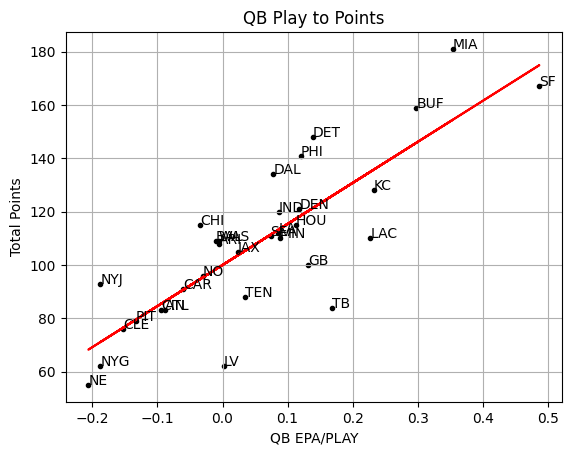

In [116]:
plt.scatter(qb_epa_per_play, tot_pt, marker='.', color='black')

for i, team in enumerate(plays.index):
    plt.annotate(team, (qb_epa_per_play[i], tot_pt[i]))

trend_line = coefficients[0] * np.array(qb_epa_per_play) + coefficients[1]

plt.plot(qb_epa_per_play, trend_line, color='red', label='Trend Line')


plt.xlabel('QB EPA/PLAY')
plt.ylabel('Total Points')
plt.title('QB Play to Points')
plt.grid(True)

plt.show()

In [117]:
logo_images = []
for team in plays.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

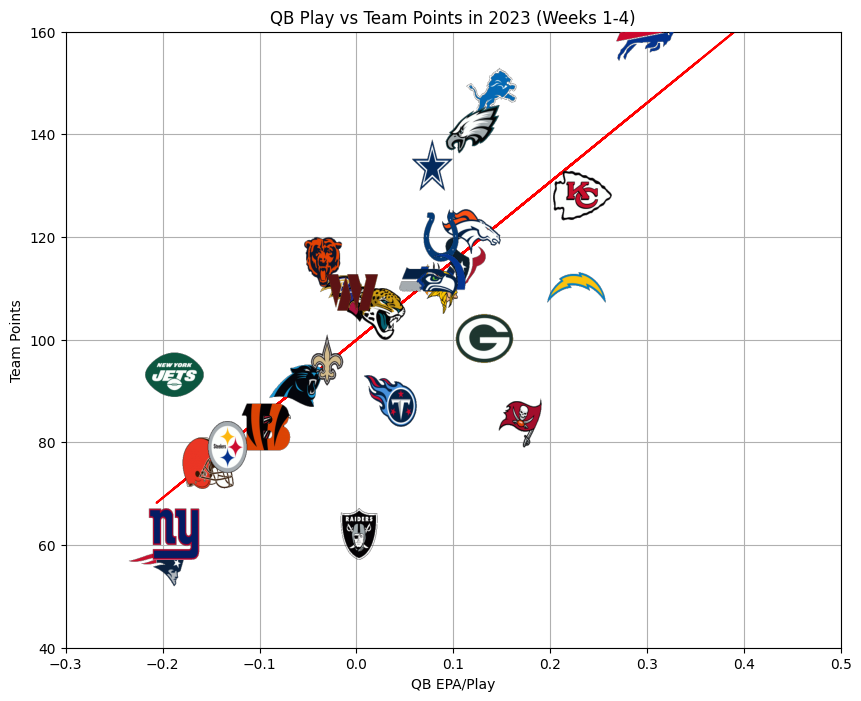

In [118]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Scatter plot with markers replaced by logos
for i in range(len(qb_epa_per_play)):
    x, y, team = qb_epa_per_play[i], tot_pt[i], plays.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x-0.03, x+0.03, y-5, y+5], aspect='auto', zorder=3)

# Trendline
trend_line = coefficients[0] * np.array(qb_epa_per_play) + coefficients[1]
plt.plot(qb_epa_per_play, trend_line, color='red', label='Trend Line')


plt.xlabel('QB EPA/Play')
plt.ylabel('Team Points')
plt.title('QB Play vs Team Points in 2023 (Weeks 1-4)')
plt.grid(True)

plt.ylim(40,160)
plt.xlim(-0.3,0.5)

plt.show()

QB BIAS

In [119]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [120]:
pass_filt = df[df['pass_location'].isin(["middle", "right", "left"])]

pass_loc = pass_filt[['posteam', 'pass_location']]
pass_loc.head()

,posteam,pass_location
3,WAS,right
5,WAS,middle
6,WAS,middle
7,WAS,left
8,WAS,left


In [121]:
total_pass = pass_loc.groupby('posteam').value_counts()
total_pass.head()

posteam  pass_location
ARI      right            64
         left             62
         middle           29
ATL      right            63
         left             56
dtype: int64

In [122]:
pass_group = pass_loc.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")

pass_group.head(96)

,posteam,pass_location,count
0,ARI,right,64
1,ARI,left,62
2,ARI,middle,29
3,ATL,right,63
4,ATL,left,56
...,...,...,...
91,TEN,left,56
92,TEN,middle,28
93,WAS,right,86
94,WAS,left,55


In [123]:
total_pass = pass_group.groupby("posteam")["count"].sum().reset_index()

total_pass = total_pass.loc[np.repeat(total_pass.index, 3)].reset_index(drop=True)

tot_pass = pd.DataFrame(total_pass)
tot_pass.head()

,posteam,count
0,ARI,155
1,ARI,155
2,ARI,155
3,ATL,157
4,ATL,157


In [124]:
pass_group["percent_loc"] = pass_group["count"] / tot_pass["count"] * 100

In [125]:
# Pivot the DataFrame to separate pass_location into columns
piv_pass_group = pass_group.pivot(index='posteam', columns='pass_location', values='percent_loc')

piv_pass_group.head()

pass_location,left,middle,right
posteam,,,
ARI,40.000000,18.709677,41.290323
ATL,35.668790,24.203822,40.127389
BAL,33.566434,30.069930,36.363636
BUF,39.655172,13.218391,47.126437
CAR,35.643564,18.316832,46.039604


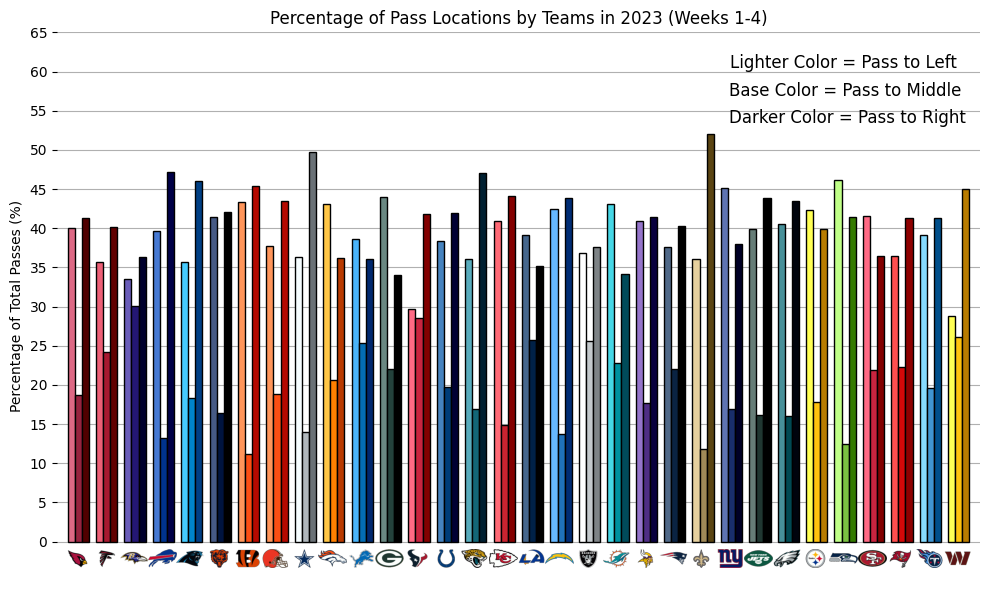

In [126]:
# Get the list of teams and their corresponding index
teams = piv_pass_group.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2023 (Weeks 1-4)')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.975, 0.96, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.98, 0.91, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.985, 0.86, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [127]:
#2022 Bias Data
pass_filt2022 = df2022[df2022['pass_location'].isin(["middle", "right", "left"])]

pass_loc2022 = pass_filt2022[['posteam', 'pass_location']]

total_pass2022 = pass_loc2022.groupby('posteam').value_counts()

pass_group2022 = pass_loc2022.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")

total_pass2022 = pass_group2022.groupby("posteam")["count"].sum().reset_index()

total_pass2022 = total_pass2022.loc[np.repeat(total_pass2022.index, 3)].reset_index(drop=True)

tot_pass2022 = pd.DataFrame(total_pass2022)

pass_group2022["percent_loc"] = pass_group2022["count"] / tot_pass2022["count"] * 100

# Pivot the DataFrame to separate pass_location into columns
piv_pass_group2022 = pass_group2022.pivot(index='posteam', columns='pass_location', values='percent_loc')

piv_pass_group2022.head()

pass_location,left,middle,right
posteam,,,
ARI,42.121212,18.333333,39.545455
ATL,37.469586,25.060827,37.469586
BAL,31.120332,27.593361,41.286307
BUF,38.917976,20.767888,40.314136
CAR,36.343612,16.079295,47.577093


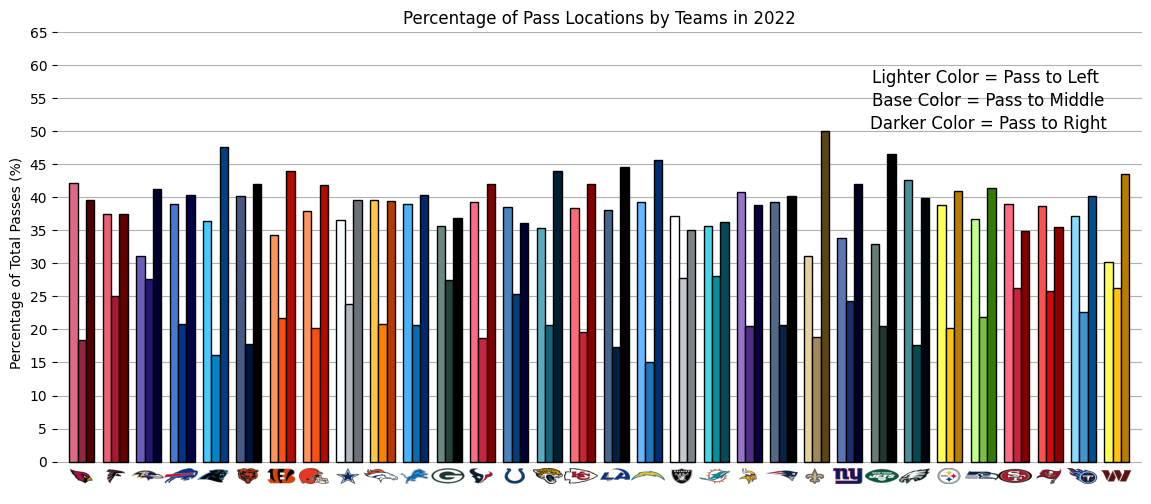

In [128]:
# Get the list of teams and their corresponding index
teams = piv_pass_group2022.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group2022[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2022')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
#plt.tight_layout()
plt.show()

In [129]:
pass_group["percent_diff"] = pass_group["percent_loc"] - pass_group2022["percent_loc"]

# Pivot the DataFrame to separate pass_location into columns
piv_passdif = pass_group.pivot(index='posteam', columns='pass_location', values='percent_diff')

piv_passdif.head()

pass_location,left,middle,right
posteam,,,
ARI,0.454545,0.376344,-0.830890
ATL,-1.800797,-0.857006,2.657802
BAL,2.446102,2.476569,-4.922671
BUF,0.737197,-7.549498,6.812301
CAR,-0.700048,2.237537,-1.537489


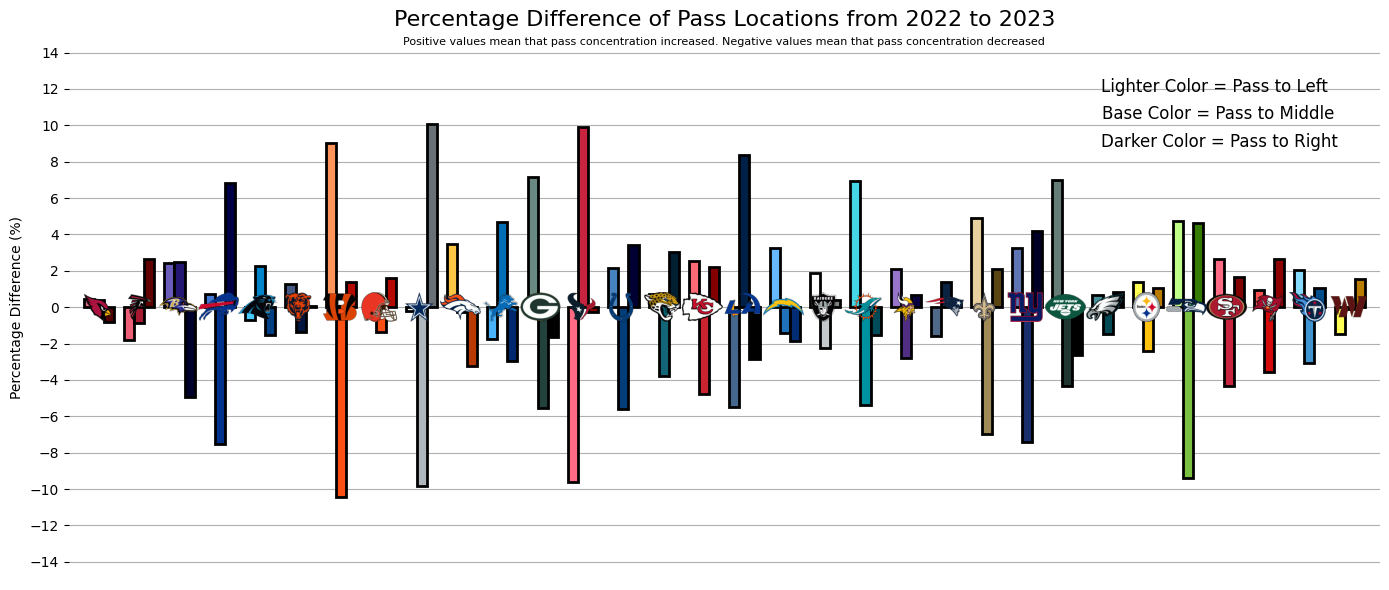

In [130]:
# Get the list of teams and their corresponding index
teams = piv_passdif.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_passdif[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=2, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -0.8 ,0.8], aspect='auto', zorder=7)


ax.set_ylabel('Percentage Difference (%)')

# Add a main title
ax.set_title('Percentage Difference of Pass Locations from 2022 to 2023', fontsize=16)

# Add a subtitle
subtitle = 'Positive values mean that pass concentration increased. Negative values mean that pass concentration decreased'
plt.text(0.5, 0.98, subtitle, fontsize=8, ha='center', transform=ax.transAxes)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.ylim([-15, 15])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(-14, 16, 2))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [131]:
qb2023 = nfl.import_weekly_data([2023])

qb2023 = qb2023[qb2023["position"] == "QB"]
qb2023.info()

Downcasting floats.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 1524
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    191 non-null    object 
 1   player_name                  191 non-null    object 
 2   player_display_name          191 non-null    object 
 3   position                     191 non-null    object 
 4   position_group               191 non-null    object 
 5   headshot_url                 190 non-null    object 
 6   recent_team                  191 non-null    object 
 7   season                       191 non-null    int32  
 8   week                         191 non-null    int32  
 9   season_type                  191 non-null    object 
 10  opponent_team                191 non-null    object 
 11  completions                  191 non-null    int32  
 12  attempts                     191 non-null    int32  
 13 

In [132]:
qb2023 = qb2023[["player_name", "recent_team", "attempts", "passing_yards", "passing_air_yards", "passing_yards_after_catch", "sacks", "passing_epa"]]
qb2023["passing_plays"] = qb2023["attempts"] + qb2023["sacks"]

qb2023.head(15)

,player_name,recent_team,attempts,passing_yards,passing_air_yards,passing_yards_after_catch,sacks,passing_epa,passing_plays
0,A.Rodgers,NYJ,1,0.0,17.0,0.0,1.0,-2.031960,2.0
2,M.Stafford,LA,38,334.0,409.0,106.0,0.0,20.679981,38.0
3,M.Stafford,LA,55,307.0,363.0,144.0,1.0,-5.089193,56.0
4,M.Stafford,LA,33,269.0,317.0,99.0,6.0,-8.404790,39.0
5,M.Stafford,LA,40,319.0,297.0,114.0,2.0,11.374352,42.0
6,M.Stafford,LA,37,222.0,366.0,90.0,4.0,-2.536261,41.0
9,B.Gabbert,KC,5,31.0,31.0,9.0,0.0,-6.706046,5.0
10,A.Dalton,CAR,58,361.0,477.0,128.0,3.0,4.548329,61.0
11,A.Dalton,CAR,0,0.0,0.0,0.0,0.0,NaN,0.0
17,T.Taylor,NYG,2,6.0,-10.0,16.0,0.0,-0.544657,2.0


In [133]:
# Group and aggregate the data
group_qb2023 = qb2023.groupby("player_name").agg({
    "passing_plays": "sum",
    "attempts": "sum",
    "passing_epa": "sum",
    "passing_air_yards": "sum",
    "passing_yards": "sum",
    "passing_yards_after_catch": "sum",
    "recent_team": "first"  # Include the team information
}).reset_index()

group_qb2023["percent_yac"] = group_qb2023["passing_yards_after_catch"] / group_qb2023["passing_yards"] * 100
group_qb2023["passing_epa_per_play"] = group_qb2023["passing_epa"] / group_qb2023["passing_plays"]
group_qb2023["adot"] = group_qb2023["passing_air_yards"] / group_qb2023["attempts"]


group_qb2023 = group_qb2023[group_qb2023["passing_plays"] > 50].reset_index(drop=True)

group_qb2023.head(35)

,player_name,passing_plays,attempts,passing_epa,passing_air_yards,passing_yards,passing_yards_after_catch,recent_team,percent_yac,passing_epa_per_play,adot
0,A.Dalton,61.0,58,4.548329,477.0,361.0,128.0,CAR,35.457062,0.074563,8.224138
1,A.Richardson,91.0,84,4.587791,668.0,577.0,297.0,IND,51.473133,0.050415,7.952381
2,B.Mayfield,129.0,125,23.578934,939.0,882.0,416.0,TB,47.165535,0.182782,7.512000
3,B.Purdy,144.0,136,67.636368,1043.0,1271.0,563.0,SF,44.295830,0.469697,7.669118
4,B.Young,156.0,144,-35.888046,912.0,750.0,393.0,CAR,52.399998,-0.230052,6.333333
5,C.Stroud,197.0,186,23.628965,1494.0,1461.0,660.0,HOU,45.174538,0.119944,8.032258
6,D.Carr,165.0,150,-7.748293,1318.0,946.0,439.0,NO,46.405922,-0.046959,8.786667
7,D.Jones,179.0,151,-56.310848,970.0,884.0,422.0,NYG,47.737556,-0.314586,6.423841
8,D.Prescott,169.0,160,2.341197,1044.0,1061.0,560.0,DAL,52.780396,0.013853,6.525000
9,D.Ridder,172.0,156,-21.219618,1162.0,1073.0,483.0,ATL,45.013981,-0.123370,7.448718


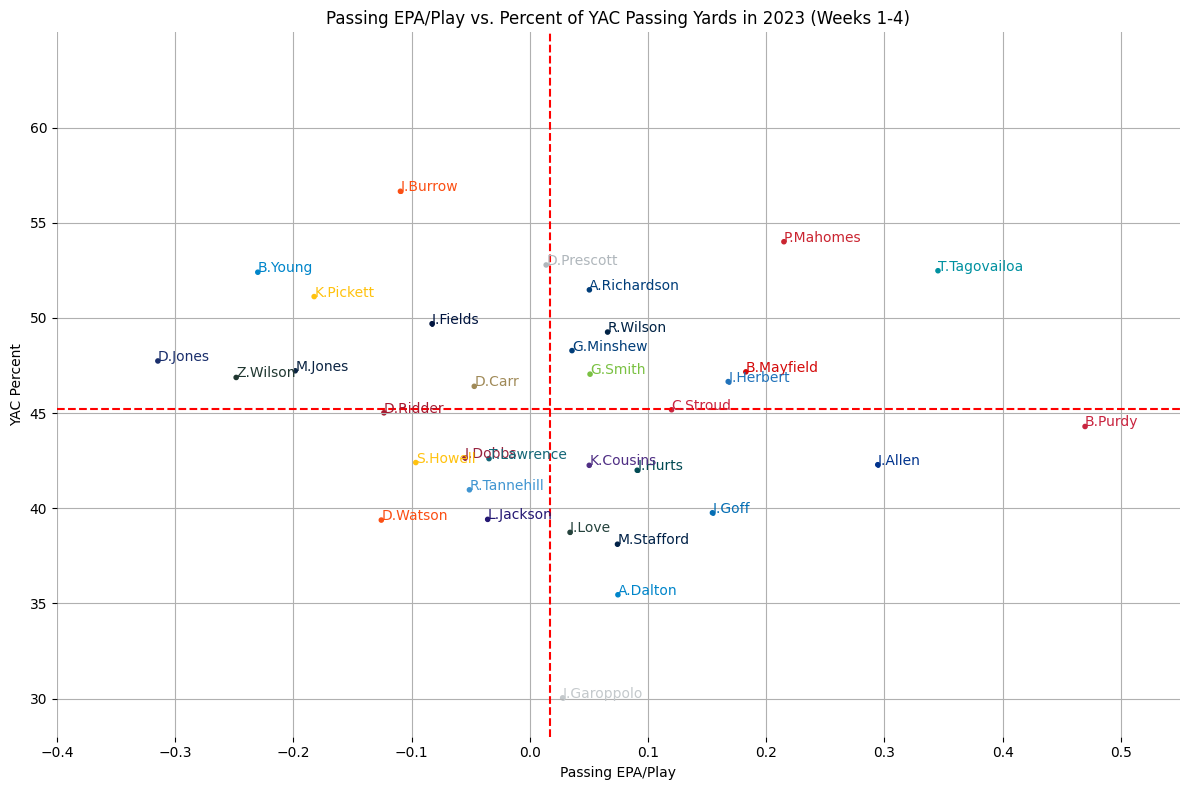

In [134]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["percent_yac"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["percent_yac"][i]), color=qb_colors[i])

mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["percent_yac"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.ylim([28, 65])
plt.xlim([-0.4, 0.55])
plt.yticks(np.arange(30, 65, 5))
plt.xticks(np.arange(-0.4, 0.55, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('YAC Percent')
ax.set_title('Passing EPA/Play vs. Percent of YAC Passing Yards in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

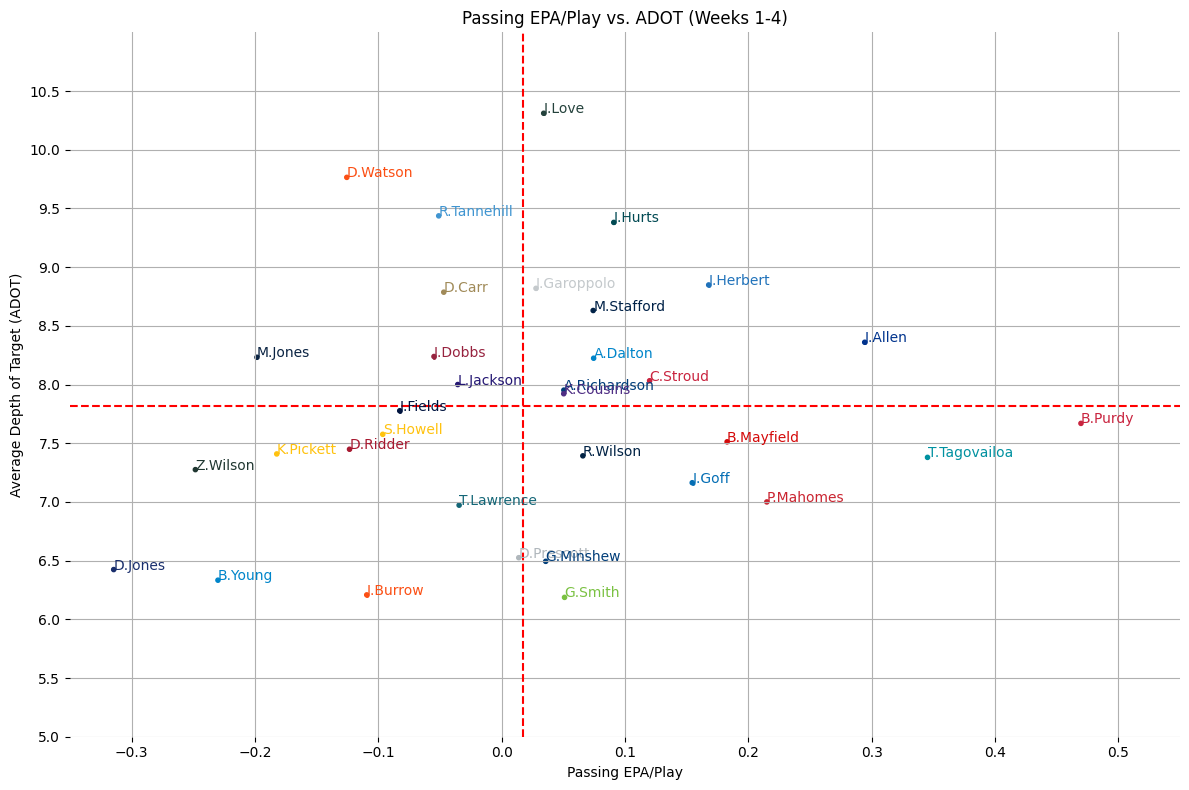

In [135]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["adot"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["adot"][i]), color=qb_colors[i])

# Mean Lines
mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["adot"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

# Axes
plt.ylim([5, 11])
plt.xlim([-0.35, 0.55])
plt.yticks(np.arange(5, 11, 0.5))
plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('Average Depth of Target (ADOT)')
ax.set_title('Passing EPA/Play vs. ADOT (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [136]:
ngs_receiving2023 = nfl.import_ngs_data("receiving", [2023])
ngs_receiving2023.head()


ngs_receiving2023 = ngs_receiving2023[ngs_receiving2023["week"] == 0].reset_index(drop=True)
ngs_receiving2023 = ngs_receiving2023[ngs_receiving2023["targets"] > 15].reset_index(drop=True)

ngs_receiving2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   season                               110 non-null    int32  
 1   season_type                          110 non-null    object 
 2   week                                 110 non-null    int32  
 3   player_display_name                  110 non-null    object 
 4   player_position                      110 non-null    object 
 5   team_abbr                            110 non-null    object 
 6   avg_cushion                          110 non-null    float64
 7   avg_separation                       110 non-null    float64
 8   avg_intended_air_yards               110 non-null    float64
 9   percent_share_of_intended_air_yards  110 non-null    float64
 10  receptions                           110 non-null    int32  
 11  targets                         

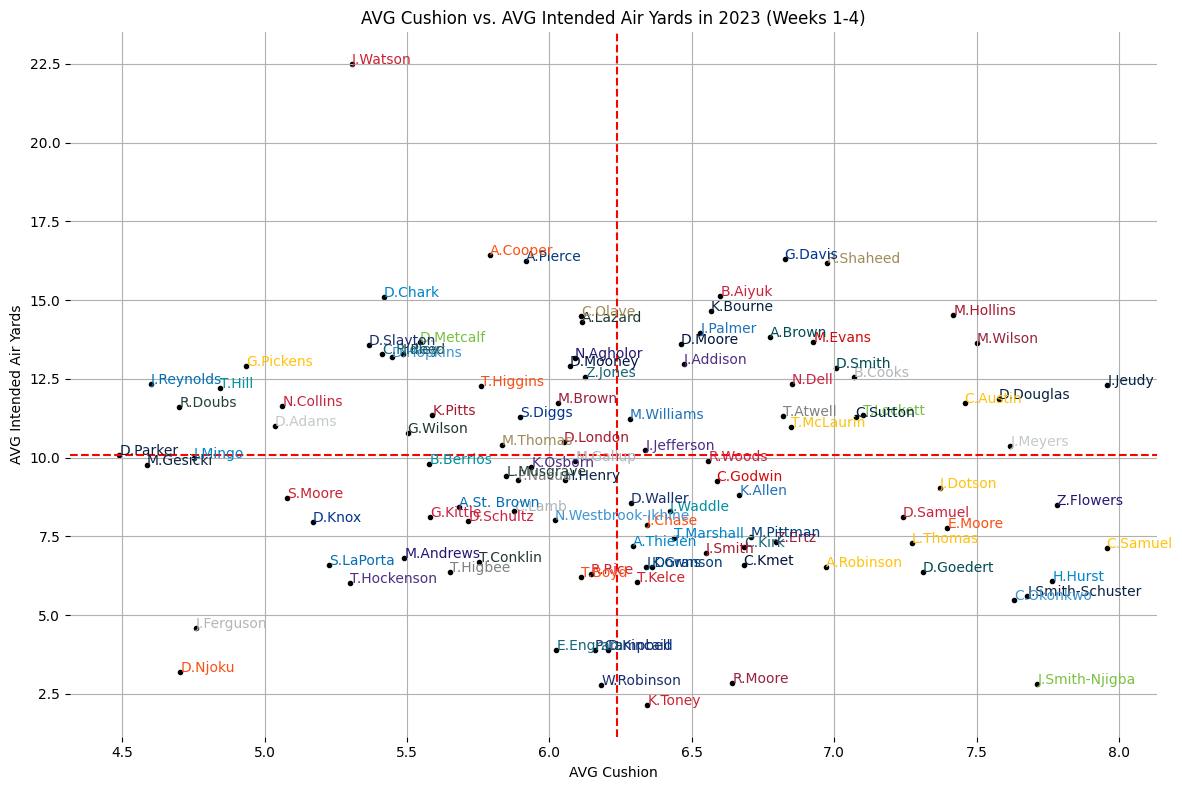

In [137]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

rec_colors = [teamcolor.get(team, "gray") for team in ngs_receiving2023["team_abbr"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(ngs_receiving2023["avg_cushion"], ngs_receiving2023["avg_intended_air_yards"], marker='.', color="black")

for i, player_name in enumerate(ngs_receiving2023["player_short_name"]):
    ax.annotate(player_name, (ngs_receiving2023["avg_cushion"][i], ngs_receiving2023["avg_intended_air_yards"][i]), color=rec_colors[i])

mean_x = np.mean(ngs_receiving2023["avg_cushion"])
mean_y = np.mean(ngs_receiving2023["avg_intended_air_yards"][i])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

# plt.ylim([5, 11])
# plt.xlim([-0.35, 0.55])
# plt.yticks(np.arange(5, 11, 0.5))
# plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('AVG Cushion')
ax.set_ylabel('AVG Intended Air Yards')
ax.set_title('AVG Cushion vs. AVG Intended Air Yards in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [138]:
ngs_passing2023 = nfl.import_ngs_data("passing", [2023])
#print(ngs2023[ngs2023["player_display_name"] == "Tyreek Hill"])

ngs_passing2023 = ngs_passing2023[ngs_passing2023["week"] == 0].reset_index(drop=True)
ngs_passing2023 = ngs_passing2023[ngs_passing2023["attempts"] > 15].reset_index(drop=True)

ngs_passing2023.head(35)

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2023,REG,0,Ryan Tannehill,QB,TEN,2.727227,6.436333,9.195899,-2.759566,14.084507,62.214613,0.253453,142,1052,2,5,75.792254,90,63.380282,63.343998,0.036284,21.651921,62.214613,00-0029701,Ryan,Tannehill,17,R.Tannehill
1,2023,REG,0,Geno Smith,QB,SEA,3.029107,5.594048,6.851552,-1.257504,9.756098,38.175586,-2.381207,123,846,5,1,97.815041,84,68.292683,62.555000,5.737683,21.521491,49.452646,00-0030565,Eugene,Smith,7,G.Smith
2,2023,REG,0,Desmond Ridder,QB,ATL,2.622115,5.505098,7.423399,-1.918301,12.179487,53.703370,-1.766144,156,1073,4,3,85.763889,102,65.384615,67.848122,-2.463507,19.745269,53.703370,00-0038122,Desmond,Ridder,9,D.Ridder
3,2023,REG,0,Anthony Richardson,QB,IND,2.740095,5.334200,7.658642,-2.324442,14.285714,51.088524,-2.057407,84,577,3,1,87.251984,50,59.523810,65.343596,-5.819786,20.609572,51.088524,00-0039164,Anthony,Richardson,5,A.Richardson
4,2023,REG,0,Tua Tagovailoa,QB,MIA,2.367139,6.334118,7.768758,-1.434640,12.650602,50.779517,-0.939317,166,1614,11,5,111.872490,119,71.686747,67.555532,4.131215,20.718326,52.901566,00-0036212,Tua,Tagovailoa,1,T.Tagovailoa
5,2023,REG,0,Aidan O'Connell,QB,LV,2.912205,4.172083,6.185000,-2.012917,17.948718,30.535659,-3.472895,39,238,0,1,68.108974,24,61.538462,66.490327,-4.951865,18.862146,42.652161,00-0038579,Aidan,O'Connell,4,A.O'Connell
6,2023,REG,0,Dak Prescott,QB,DAL,2.526256,4.392342,6.622516,-2.230174,13.125000,43.744927,-1.532323,160,1061,5,4,87.526042,111,69.375000,67.494481,1.880519,19.553439,62.445780,00-0033077,Rayne,Prescott,4,D.Prescott
7,2023,REG,0,Josh Allen,QB,BUF,2.879190,6.398047,8.593155,-2.195108,18.857143,54.935021,-0.555655,175,1407,11,5,105.583333,128,73.142857,65.249637,7.893220,22.408416,58.278686,00-0034857,Joshua,Allen,17,J.Allen
8,2023,REG,0,Daniel Jones,QB,NYG,2.731172,4.240481,6.349236,-2.108755,10.596026,50.971814,-3.046597,151,884,2,6,71.730132,104,68.874172,67.106301,1.767871,19.275451,53.366384,00-0035710,Daniel,Jones,8,D.Jones
9,2023,REG,0,Kenny Pickett,QB,PIT,2.954184,5.082000,7.572468,-2.490468,25.786164,46.029757,-1.278182,159,1027,5,4,78.786688,95,59.748428,58.740020,1.008408,21.530743,54.874927,00-0038102,Kenny,Pickett,8,K.Pickett


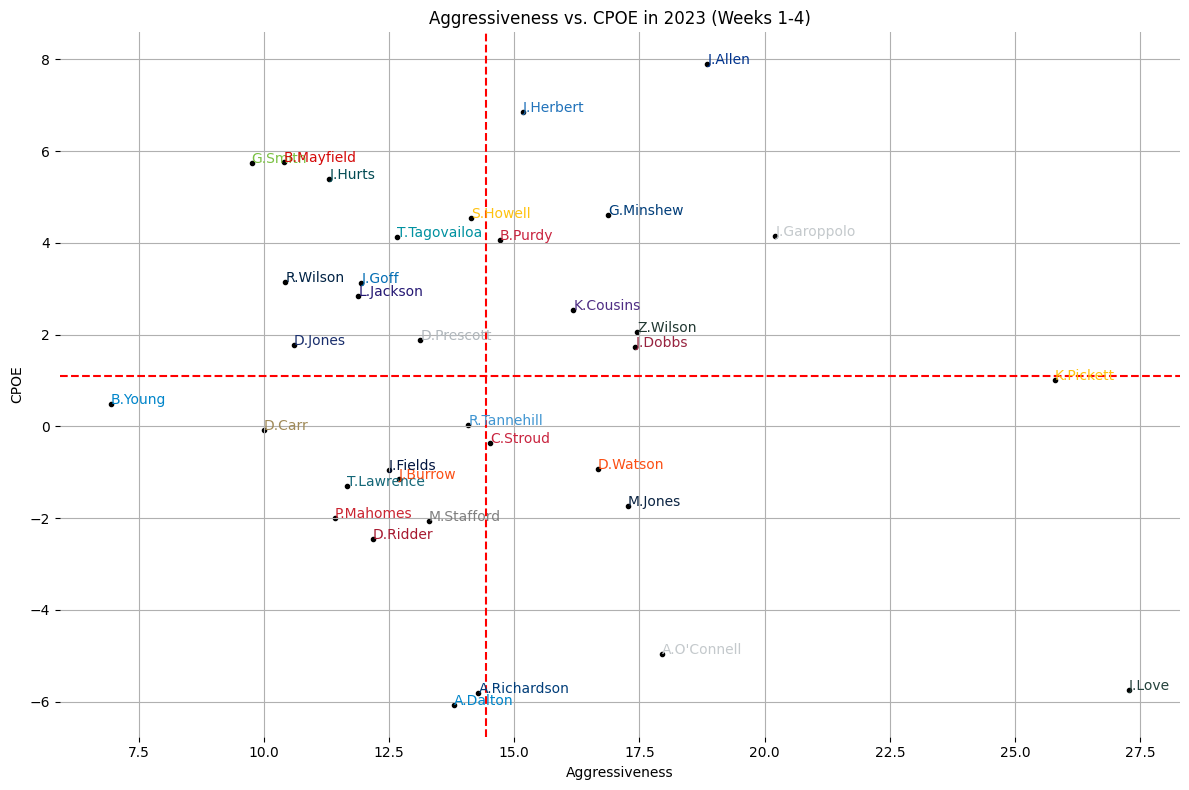

In [139]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

pass_colors = [teamcolor.get(team, "gray") for team in ngs_passing2023["team_abbr"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(ngs_passing2023["aggressiveness"], ngs_passing2023["completion_percentage_above_expectation"], marker='.', color="black")

for i, player_name in enumerate(ngs_passing2023["player_short_name"]):
    ax.annotate(player_name, (ngs_passing2023["aggressiveness"][i], ngs_passing2023["completion_percentage_above_expectation"][i]), color=pass_colors[i])

mean_x = np.mean(ngs_passing2023["aggressiveness"])
mean_y = np.mean(ngs_passing2023["completion_percentage_above_expectation"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')


ax.set_xlabel('Aggressiveness')
ax.set_ylabel('CPOE')
ax.set_title('Aggressiveness vs. CPOE in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [140]:
pbp = nfl.import_pbp_data(years, downcast=True)
pd.set_option('display.max_columns', None)

pbp.head()

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [141]:
pbp = pbp[pbp["play_type"].isin(["pass", "run"])].reset_index(drop=True)

per_play = pbp.groupby(["posteam", "play_type"]).size().reset_index()

group_pbp = pbp.groupby(["posteam", "play_type"])["epa"].sum().reset_index()

pass_pbp = group_pbp[group_pbp["play_type"] == "pass"].reset_index(drop=True)
run_pbp = group_pbp[group_pbp["play_type"] == "run"].reset_index(drop=True)

per_play = per_play.rename(columns={0: "play_count"})

pass_play = per_play[per_play["play_type"] == "pass"].reset_index(drop=True)
run_play = per_play[per_play["play_type"] == "run"].reset_index(drop=True)

pass_pbp["pass_epa_per_play"] = pass_pbp["epa"] / pass_play["play_count"]
run_pbp["run_epa_per_play"] = run_pbp["epa"] / run_play["play_count"]

pass_pbp.head()

,posteam,play_type,epa,pass_epa_per_play
0,ARI,pass,-9.948373,-0.060293
1,ATL,pass,-24.996443,-0.143658
2,BAL,pass,-15.440983,-0.097728
3,BUF,pass,50.660973,0.275331
4,CAR,pass,-30.286718,-0.138930


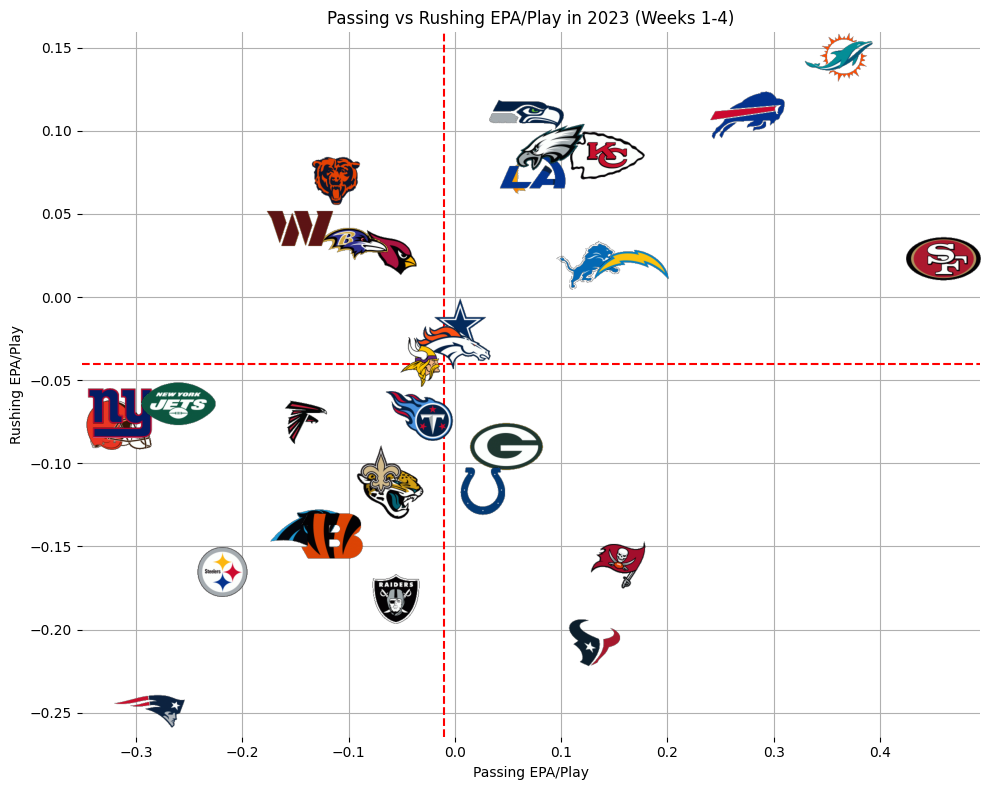

In [142]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Scatter plot with markers replaced by logos
for i in range(len(pass_pbp["pass_epa_per_play"])):
    x, y, team = pass_pbp["pass_epa_per_play"][i], run_pbp["run_epa_per_play"][i], pass_pbp["posteam"][i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x-0.035, x+0.035, y-0.015, y+0.015], aspect='auto', zorder=3)

mean_x = np.mean(pass_pbp["pass_epa_per_play"])
mean_y = np.mean(run_pbp["run_epa_per_play"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.xlabel('Passing EPA/Play')
plt.ylabel('Rushing EPA/Play')
plt.title('Passing vs Rushing EPA/Play in 2023 (Weeks 1-4)')
plt.grid(True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

What percentage teams pass out of each Formation and Personel

In [143]:
#total_plays = form_data_group.groupby("play_type")["count"].transform("sum")

In [144]:
x = nfl.import_pbp_data([2023], downcast=True)
x.head(40)

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [145]:
form_data = nfl.import_pbp_data([2023], downcast=True)
form_data = form_data[["play_type", "offense_formation"]]
form_data = form_data[(form_data["play_type"] == "pass") | (form_data["play_type"] == "run")]

form_data_group = form_data.groupby(["play_type","offense_formation"]).size().reset_index(name = "count")
pass_form = form_data_group[form_data_group["play_type"] == "pass"]
pass_percent_data = form_data_group.groupby("offense_formation")["count"].sum().reset_index()

pass_percent_data["pass_percentage"] = (pass_form["count"] / pass_percent_data["count"]) * 100
pass_percent_data = pass_percent_data.sort_values(by= "pass_percentage", ascending=False).reset_index()

2023 done.
Downcasting floats.


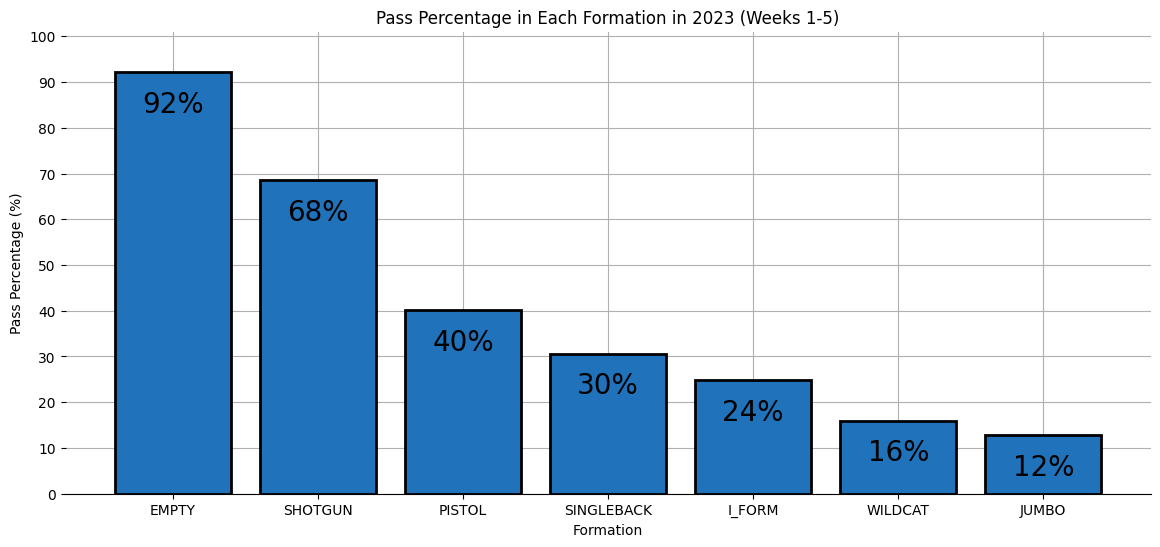

In [203]:
plt.figure(figsize=(14, 6))
plt.bar(pass_percent_data["offense_formation"], pass_percent_data["pass_percentage"], width = .8, color = (32/255, 114/255, 186/255), edgecolor = "k", linewidth = 2, zorder = 5)

for i in range(len(pass_percent_data)):
  plt.text(i, pass_percent_data["pass_percentage"][i]-7, f'{int(pass_percent_data["pass_percentage"][i])}%', ha='center', va='center', color='k', fontsize=20, zorder = 10)

plt.xlabel('Formation')
plt.ylabel('Pass Percentage (%)')
plt.title('Pass Percentage in Each Formation in 2023 (Weeks 1-5)')

plt.grid(True)

plt.ylim(0, 101)
plt.yticks(np.arange(0, 101, 10))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

In [223]:
pers_data = nfl.import_pbp_data([2023], downcast=True)
pers_data = pers_data[["play_type", "offense_personnel"]]
pers_data = pers_data[(pers_data["play_type"] == "pass") | (pers_data["play_type"] == "run")]



pers_data_group = pers_data.groupby(["play_type","offense_personnel"]).size().reset_index(name = "count").sort_values(by = "count")
pers_data_group = pers_data_group[pers_data_group["count"] > 10]
pers_data_group.head(100)

pers_form = pers_data_group[pers_data_group["play_type"] == "pass"].reset_index(drop=True)
pass_pers_percent = pers_data_group.groupby("offense_personnel")["count"].sum().reset_index()

personnel_data = pers_form.merge(pass_pers_percent, on='offense_personnel', suffixes=('_pass', '_play_total'))
personnel_data["pass_percentage"] = (personnel_data["count_pass"] / personnel_data["count_play_total"] * 100)
personnel_data = personnel_data.sort_values(by = "pass_percentage", ascending = False).reset_index()

personnel_data = personnel_data[personnel_data.index > 2].reset_index()

2023 done.
Downcasting floats.


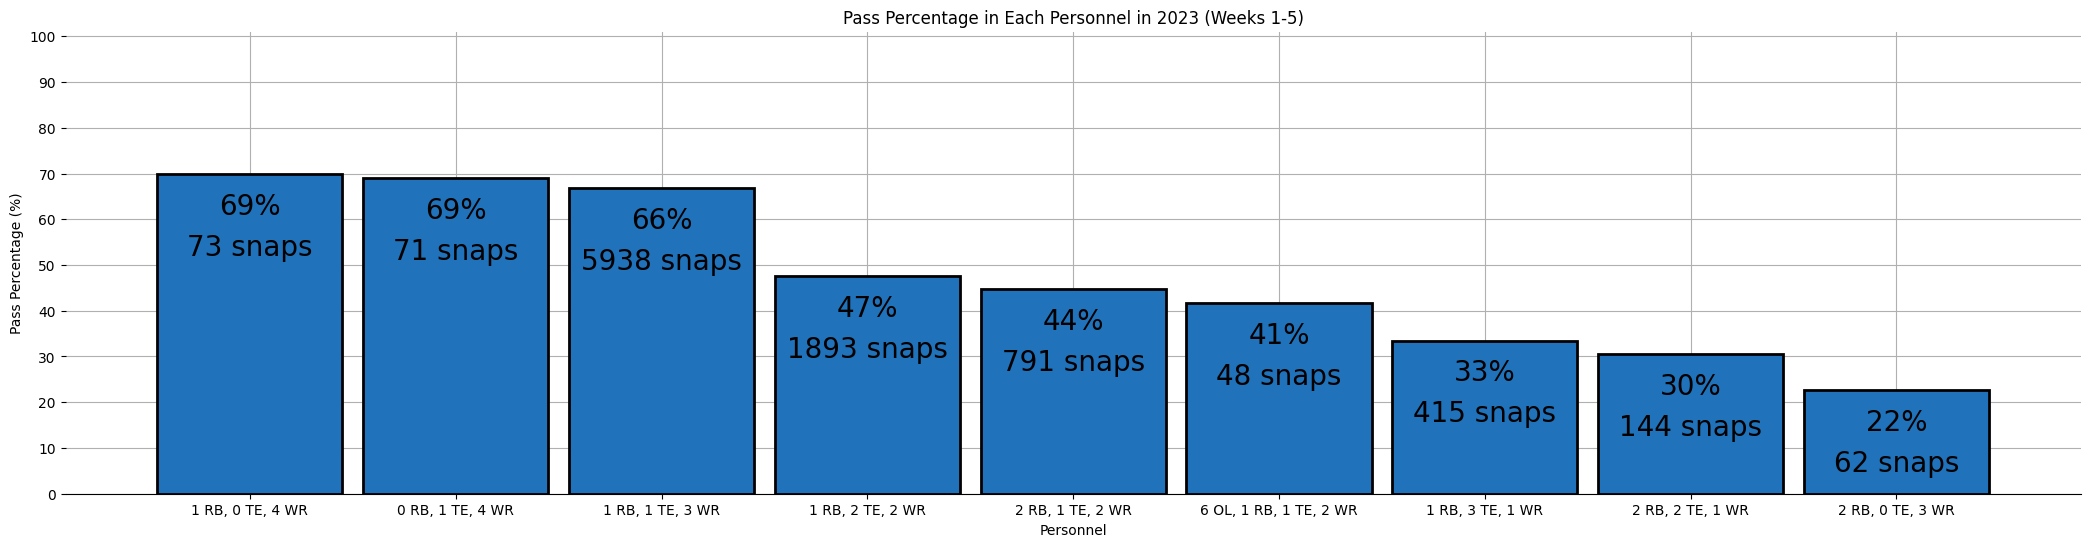

In [230]:
plt.figure(figsize=(26, 6))

plt.bar(personnel_data["offense_personnel"], personnel_data["pass_percentage"], width = 0.9, color = (32/255, 114/255, 186/255), edgecolor = "k", linewidth = 2, zorder = 5)

# for i in range(len(personnel_data)):
#   plt.text(i, personnel_data["pass_percentage"][i]-10, f'{int(personnel_data["pass_percentage"][i])}%', ha='center', va='center', color='k', fontsize=20, zorder = 10)
for i in range(len(personnel_data)):
  plt.text(i, personnel_data["pass_percentage"][i]-7, f'{int(personnel_data["pass_percentage"][i])}%', ha='center', va='center', color='k', fontsize=20, zorder = 10)
  plt.text(i, personnel_data["pass_percentage"][i]-16, f'{int(personnel_data["count_play_total"][i])} snaps', ha='center', va='center', color='k', fontsize=20, zorder = 10)

plt.xlabel('Personnel')
plt.ylabel('Pass Percentage (%)')
plt.title('Pass Percentage in Each Personnel in 2023 (Weeks 1-5)')

plt.grid(True)

plt.ylim(0, 101)
plt.yticks(np.arange(0, 101, 10))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()